In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/AlfarrelIndrawan/data-review-spk/main/spk%20teks.txt'
data = pd.read_csv(url, delimiter = "\t", encoding='cp1252')

In [ ]:
data

,rating,review,jenis_review
0,1,"Bagaimana bisa,,data di KTP saya, saya isi ke ...",0
1,1,Saya kasih satu dulu karena aplikasi saat dido...,0
2,1,Admin. Masalah saya yg pertama saat melakukan ...,0
3,1,Sangat kecewa & tdk profesional sekali. Cs ped...,0
4,1,Aplikasinya sangat buruk. Registrasinya susah ...,0
...,...,...,...
195,5,"Saya vaksin yang pertama tgl 09/10/2021 , dan ...",1
196,5,Alhamdulillah sejauh ini saya tidak ada kendal...,1
197,5,Aplikasi ini sangat dibutuhkan banget untuk ma...,1
198,5,"Alhamdulilah apk nya membantu banget, syukur j...",1


# Preprocessing

In [ ]:
!pip install PySastrawi
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

contoh = data['review'][0]
print("Sebelum dirubah: " + data['review'][0])
print("Sesudah dirubah: " + stemmer.stem(contoh))

Sebelum dirubah: Bagaimana bisa,,data di KTP saya, saya isi ke aplikasi peduli lindungi bisa tidak singkron, ini ktp asli lho bos!!!! Bisa2 nya bisa muncul tulisan "sesuaikan nama dan nik anda dengan Ktp" , saya harus mengadu kemana telpon ke 119 ex 9,, ga bisa terus,, jangan bikin bingung bos kalo bikin aplikasi,!!
Sesudah dirubah: bagaimana bisa data di ktp saya saya isi ke aplikasi peduli lindung bisa tidak singkron ini ktp asli lho bos bisa2 nya bisa muncul tulis sesuai nama dan nik anda dengan ktp saya harus adu mana telpon ke 119 ex 9 ga bisa terus jangan bikin bingung bos kalo bikin aplikasi


In [ ]:
x=[]
for teks in data.review:
    x.append(stemmer.stem(teks))

In [ ]:
clean_review=pd.DataFrame({'clean_review':x})

In [ ]:
clean_review

,clean_review
0,bagaimana bisa data di ktp saya saya isi ke ap...
1,saya kasih satu dulu karena aplikasi saat dido...
2,admin masalah saya yg pertama saat laku daftar...
3,sangat kecewa tdk profesional sekali cs peduli...
4,aplikasi sangat buruk registrasi susah sekali ...
...,...
195,saya vaksin yang pertama tgl 09 10 2021 dan ba...
196,alhamdulillah jauh ini saya tidak ada kendala ...
197,aplikasi ini sangat butuh banget untuk masa se...
198,alhamdulilah apk nya bantu banget syukur juga ...


In [ ]:
data['review'] = clean_review

In [ ]:
data['jenis_review']=data['jenis_review'].map({1:'positif',0:'negatif'})

In [ ]:
data

,rating,review,jenis_review
0,1,bagaimana bisa data di ktp saya saya isi ke ap...,negatif
1,1,saya kasih satu dulu karena aplikasi saat dido...,negatif
2,1,admin masalah saya yg pertama saat laku daftar...,negatif
3,1,sangat kecewa tdk profesional sekali cs peduli...,negatif
4,1,aplikasi sangat buruk registrasi susah sekali ...,negatif
...,...,...,...
195,5,saya vaksin yang pertama tgl 09 10 2021 dan ba...,positif
196,5,alhamdulillah jauh ini saya tidak ada kendala ...,positif
197,5,aplikasi ini sangat butuh banget untuk masa se...,positif
198,5,alhamdulilah apk nya bantu banget syukur juga ...,positif


# Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.review
y = data.jenis_review
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec=CountVectorizer()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.preprocessing import FunctionTransformer

model = make_pipeline(
     cvec,
     FunctionTransformer(lambda x: x.todense(), accept_sparse=True), 
     clf
)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7feeddf18f80>)),
                ('gaussiannb', GaussianNB())])

In [ ]:
hasil=model.predict(x_test)
hasil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array(['negatif', 'negatif', 'negatif', 'positif', 'negatif', 'positif',
       'negatif', 'positif', 'positif', 'negatif', 'negatif', 'negatif',
       'positif', 'negatif', 'negatif', 'positif', 'negatif', 'positif',
       'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'positif',
       'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'positif',
       'positif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif',
       'positif', 'negatif'], dtype='<U7')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

Text(0.5, 15.0, 'Predicted label')

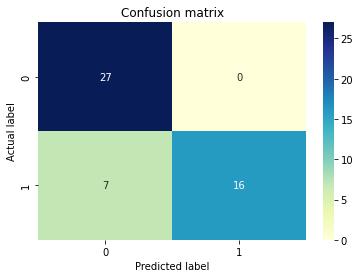

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
cnf_matrix = confusion_matrix(y_test, hasil)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy_score(hasil,y_test)

0.86

In [ ]:
print('Masukkan review:')
review = input()
hasil_review = model.predict([review])
print('Review berkategori: ' + hasil_review[0])

Masukkan review:
aplikasi kecewa
Review berkategori: negatif


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
